# County to county diagnostics

This notebook is uses the ACS 2006 to 2010 ACS county to county migration data to examine cluster-level movers and nonmovers and flows between clusters. County-level data prepared using script `share_movers_nonmovers.py`. Each row of data represents an origin county and columns have aggregated counts of flows from each county to each type of cluster. Rows can be grouped into the cluster they belong to in order to create a matrix of flows to and from each cluster.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
# # import jtplot submodule from jupyterthemes
# from jupyterthemes import jtplot

# # currently installed theme will be used to
# # set plot style if no arguments provided
# jtplot.style()
%matplotlib inline

In [2]:
# read in data
infile = "/home/eric/Documents/franklin/github_public/temp/ACS_migration_nocharacteristics.pickle"
df = pd.read_pickle(infile)
df.head()

,pop2000,pop2010,name,movers,L_EmergingLoss,L_IsolatedLoss,G_InterrupedGrowth,L_PersistentLoss,nonmovers,L_PunctuatedLoss,countyfp,source_cluster,G_IntermittentGrowth,G_ConstantGrowth,G_EarlyRecovery,statefp,total_outmigration
01001,43671.0,54571.0,Autauga,7060,63,10,190,0,45383,318,001,G_EarlyRecovery,435,1027,1402,01,0
01003,140415.0,182265.0,Baldwin,28840,671,52,787,56,144068,930,003,G_ConstantGrowth,543,4709,1254,01,0
01005,29038.0,27457.0,Barbour,4632,86,0,217,57,22591,515,005,L_EmergingLoss,350,378,567,01,0
01007,19889.0,22915.0,Bibb,2088,126,0,542,74,20325,251,007,G_EarlyRecovery,194,144,549,01,0
01009,51022.0,57322.0,Blount,6798,19,0,188,85,48914,784,009,G_IntermittentGrowth,476,438,784,01,0


In [3]:
# count counties by cluster
pd.crosstab(index=df['source_cluster'], columns='count')

col_0,count
source_cluster,
G_ConstantGrowth,676
G_EarlyRecovery,553
G_IntermittentGrowth,614
G_InterrupedGrowth,176
L_EmergingLoss,211
L_IsolatedLoss,56
L_PersistentLoss,239
L_PunctuatedLoss,584


In [4]:
# how many movers and nonmovers in each cluster?
df.groupby('source_cluster')[['movers', 'nonmovers']].sum()

,movers,nonmovers
source_cluster,,
G_ConstantGrowth,24495531,128642266
G_EarlyRecovery,4649623,23529139
G_IntermittentGrowth,5365891,32901763
G_InterrupedGrowth,4708352,28872432
L_EmergingLoss,1427984,9111084
L_IsolatedLoss,972948,5215519
L_PersistentLoss,553500,4030933
L_PunctuatedLoss,2992564,18772704


In [5]:
# what percentage of the population are movers and nonmovers in each cluster?
grouped = df.groupby('source_cluster')[['movers', 'nonmovers']].sum()
grouped.div(grouped.sum(axis=1), axis=0)

,movers,nonmovers
source_cluster,,
G_ConstantGrowth,0.159957,0.840043
G_EarlyRecovery,0.165005,0.834995
G_IntermittentGrowth,0.140220,0.859780
G_InterrupedGrowth,0.140210,0.859790
L_EmergingLoss,0.135494,0.864506
L_IsolatedLoss,0.157220,0.842780
L_PersistentLoss,0.120735,0.879265
L_PunctuatedLoss,0.137493,0.862507


very little difference in percent of movers and nonmovers across clusters

In [6]:
# let's show full cluster to cluster flows matrix
# first pull unique cluster labels from "source_cluster" field
cluster_list = df.source_cluster.unique().tolist()
# convert from unicode to string
cluster_list = [str(x) for x in cluster_list]
cluster_list  = sorted(cluster_list)
cluster_list

['G_ConstantGrowth',
 'G_EarlyRecovery',
 'G_IntermittentGrowth',
 'G_InterrupedGrowth',
 'L_EmergingLoss',
 'L_IsolatedLoss',
 'L_PersistentLoss',
 'L_PunctuatedLoss']

In [7]:
mig_matrix = df.groupby('source_cluster')[cluster_list].sum()
mig_matrix

,G_ConstantGrowth,G_EarlyRecovery,G_IntermittentGrowth,G_InterrupedGrowth,L_EmergingLoss,L_IsolatedLoss,L_PersistentLoss,L_PunctuatedLoss
source_cluster,,,,,,,,
G_ConstantGrowth,5659876,912447,699268,691503,184285,82659,44003,318602
G_EarlyRecovery,796357,503676,205908,96469,53915,12225,12877,92315
G_IntermittentGrowth,820332,229261,460159,294030,74636,74324,39012,232190
G_InterrupedGrowth,859495,106153,281888,506991,65680,37334,17258,126333
L_EmergingLoss,242499,63142,82869,75188,55568,14356,6873,53763
L_IsolatedLoss,123406,18787,105340,44652,16004,6632,3473,38574
L_PersistentLoss,51624,14234,43912,17955,8084,4276,42232,44122
L_PunctuatedLoss,387924,117617,289739,141298,55555,28125,45705,165254


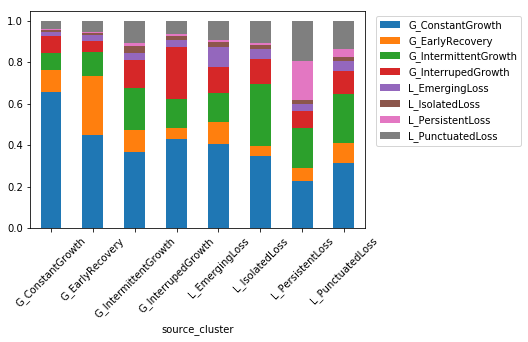

In [8]:
# show percentage of moves from origin to destination by origin cluster
ax=mig_matrix.div(mig_matrix.sum(axis=1),axis=0).plot(kind='bar', stacked=True, grid=False)
ax.legend(loc='upper center', bbox_to_anchor=(1.25,1))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)